# ```aggregate```: Simple Examples

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

In [ ]:
uw = agg.Underwriter()

In [ ]:
uw.list()

In [ ]:
uw.describe(pretty_print=True);

In [ ]:
uw.describe('severity')

In [ ]:
uw['liaba']

In [ ]:
uw.liabc.plot()

In [ ]:
ag = uw.ppal
ag.easy_update(14)
ag.report('audit')

In [ ]:
pf = uw.bodoff1
pf.update(8, 1)

In [ ]:
pf.plot('density')

In [ ]:
c = uw.write('a: 0.01 * uw.cmp', 'test', update=True, log2=13) 
c.plot(subplots=True, height=4)

In [ ]:
biz = uw['homeowners'] 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')

In [ ]:
biz = uw.homeowners 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')

In [ ]:
biz.easy_update(10)
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
biz.report('audit')

In [ ]:
biz.recommend_bucket(verbose=True)

In [ ]:
a, b = biz.easy_update(10, reporting_level=1, verbose=True)
display(a)
display(b)

In [ ]:
biz.audit_df

In [ ]:
biz.report('all')

# Script Examples

In [ ]:
s = uw.write('sev MyLN1 12 * lognorm 1; sev MyLN2 12 * lognorm 2; sev MyLN3 12 * lognorm 3; ')

In [ ]:
for v in s:
    print(v.moms())
    v.plot()
print([ 12 * np.exp(x*x/2) for  x in [1,2,3]])

In [ ]:
pf = uw.write('PA: 0.0085 * uw.pers_auto; CA: 0.02 * uw.comm_auto;WC: 0.005 * uw.work_comp', 'test', True, False, log2=16, bs=10e4, remove_fuzz=True)

In [ ]:
print(pf)

In [ ]:
pf.report('quick')

In [ ]:
pf.plot('audit', aspect=1.4, height=2.25)

## More complex program 

In [ ]:
ans = uw.write("""
A1: 50  claims          on gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 xs 10 on gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims          on gamma 12 cv 1.30 (mixed gamma 0.014)
A4: 50  claims 30 xs 20 on gamma 12 cv 1.30 (mixed gamma 0.14); B 15 claims 15 xs 15 on lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 xs 5  on 25 * pareto 1.3 0 - 25 poisson 
ppa: 1e-8 * uw.ppal
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

In [ ]:
ans.recommend_bucket()

In [ ]:
ans.update(13, 1, remove_fuzz=True)

In [ ]:
ans.plot('density', subplots=True, logy=True)

In [ ]:
ans.report('audit')

In [ ]:
for a in ans:
    print(a.name, a.attachment, a.limit, a.recommend_bucket(), a.agg_m, a.agg_cv, a.agg_skew)

In [ ]:
for a in ans:
    print(a)

In [ ]:
ans.report()

In [ ]:
for col in ['Cat']:
    print(col)
    t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

In [ ]:
type(t2)

In [ ]:
n = np.argwhere(np.isnan(t2))
ans.density_df.filter(regex='p_total|ex(le)?a_A$|loss|F|S|exi_xgta_A$').iloc[n[0][0]-10:n[0][0]+10, :]

In [ ]:
t2[1500:2000]

# Integrated Parser

In [ ]:
program1 = """
A:    50  claims,             on  gamma 12 cv .30          mixed gamma 0.014
Ba:  500 loss,                on lognorm 50 cv .8
Bb:  500 loss,  1000 xs 0     on lognorm 50 cv .8
Bg:  500 loss,                on gamma 50 cv .8
C:   500  loss,      75 xs 25, on lognorm 50 cv .9
D:    25  claims,    30 xs 20,  on gamma 12 cv 1.30         (mixed gamma 0.85)
Cat1:  1.7 claims,  125 xs 5,   on 25 * pareto 1.3 - 25 
Cat2:  3.5 claims, 1000 xs 0,  on 25 * pareto 2.3 0 - 25
"""
program2 = """
Thick:  500 loss,            on lognorm 50 cv .8
Thin:  500 loss,  1000 xs 0  on lognorm 50 cv .8
Cat:  2 claims,  1250 xs 5,  on 25 * pareto 1.3 - 25 
"""

program3 = '''
MyWC: 0.005 * uw.work_comp
InHomCA: uw.comm_auto * 0.002 ;
HomCA: 0.001 * uw.comm_auto
Cat: 50000000 loss 1e9 xs 0 on 50000000 * pareto 1.3 - 50000000
'''

ans1 = uw.write(program1, 'script example 1', True, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
ans2 = uw.write(program2, 'script example 2', True, False, log2=10, remove_fuzz=True, trim_df=False)
ans3 = uw.write(program3, 'script example 3', True, False, log2=11, padding=2, remove_fuzz=True, trim_df=False)
# %timeit ans = uw.write(program, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
ans = [ans1, ans2, ans3]

In [ ]:
for a in ans:
    a.report()
    a.plot('density', subplots=True, logy=True)

In [ ]:
ans[2].q(.999)

In [ ]:
uw['liaba']

In [ ]:
agg.Severity(**uw['liaba'][1]).plot()

In [ ]:
ans = uw.write('sev CA_PPA lognorm 12 cv 2; sev ilppa 12 * lognorm 2.1')
ans

In [ ]:
for a in ans:
    a.plot()

# Distortions and Pricing

## Line names must be all lower case [a-z] only, no underscores, spaces or numbers

In [ ]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 50 claims             | [50, 100, 150, 200] xs 0 | on lognorm 12 cv [1,2,3,4] wts [0.25 .25 .25 .25] | poisson           |
| low         | 500 premium at 0.5    | 5 xs 5                   | on gamma 12 cv .30                                | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | on gamma 12 cv .30                                | mixed gamma 0.4   |
| xsa         | 50  claims            | 30 xs 10                 | on gamma 12 cv .30                                | mixed gamma 0.8   |
| hcmp        | 1e-8 * uw.cmp         |                          |                                                   |                   |
"""

In [ ]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=12, remove_fuzz=True)

In [ ]:
a = agg.axiter_factory(None, 24, aspect=1.4, height=2)
port.plot('quick', axiter=a)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2, logy=True, ylim=[1e-10, 1e-2])
a.tidy()
agg.suptitle_and_tight('Density Plots for Portfolio 1')

In [ ]:
port.plot('audit', aspect=1.2, height=2.5)

In [ ]:
port.plot('priority', aspect=1.2, height=2.5)

In [ ]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 0.50 claims           | [50, 100, 150, 2000] xs 0 | on 12 * lognorm [1,2,3,14] wts [0.25 .25 .25 .25] | poisson           |
| low         | 1.500 claims          | 1250 xs 5                | on 400 * pareto 2.2 - 400                           | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | on gamma 12 cv .30                                | mixed gamma 0.4   |
| hard        | 50  claims            | 30 xs 10                 | on gamma 12 cv .30                                | mixed gamma 0.8   |
"""

In [ ]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=14, bs=0.5, remove_fuzz=True)

In [ ]:
port.recommend_bucket()

In [ ]:
port.report('audit')

In [ ]:
port.plot('density', subplots=True,)
port.plot('density', subplots=True, logy=True)

In [ ]:
port.uat(verbose=True,);

In [ ]:
K = port.q(0.995)  # Resonable capital scale
LR = 0.7
K

In [ ]:
cd = port.calibrate_distortions(LRs=[LR], As=[K])

In [ ]:
cd

In [ ]:
dd = agg.Distortion.distortions_from_params(cd, (K, LR), plot=True)

In [ ]:
dd

In [ ]:
ans_table, ans_stacked = port.apply_distortions(dd, As=[port.q(0.99), port.q(0.995), port.q(0.999)], num_plots=2)

In [ ]:

f = sns.factorplot(x='return', y='value', row='line', col='method', size=2.5, kind='bar',
                           data=ans_stacked.query(' stat=="lr" ')) 

In [ ]:
f.fig

In [22]:
ft = lambda x: np.fft.fft(x)

In [27]:
ift = lambda x : np.fft.ifft(x)

In [117]:
def eg(cv, mean, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    p = np.real(ift(np.exp(mean * (fz-1))))
    c2 = cv*cv
    k = 1/c2
    P = mean * c2
    nb = np.real(ift( (1+P-P*fz)**-k ))
    df = pd.DataFrame(dict(x=range(N), poisson=p, negbin=nb))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    nbm, nbm2, nbm3 = ((df.x**k * df.negbin).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    nbv = nbm2 - nbm*nbm
    c = (nbv/nbm-1)/nbm,
    display(pd.DataFrame(dict(k=k, P=P, pm=pm, pv=pv, nbm=nbm, nbv=nbv, enbv=mean*(1+cv*cv*mean), c=c, nbm3=nbm3, nbm3th=(k*P)**2*(3*(1+P)+P*k)+k*P*(1+P)*(1+2*P)), index=['Sample']))
    return df

,k,P,pm,pv,nbm,nbv,enbv,c,nbm3,nbm3th
Sample,1.524158,13.122,20.0,20.0,20.0,282.44,282.44,0.6561,32641.195364,32641.19536


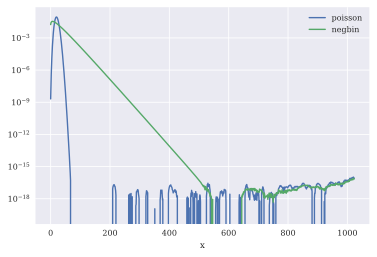

In [120]:
a = eg(.81, 20, 10, logy=True)

In [87]:
(df.x**2 * df.poisson).sum()

110.00000000001143

In [121]:
from scipy.special import kv

In [132]:
kv(0.5, np.linspace(0,10,20))

array([             nan,   1.02061206e+00,   4.26353326e-01,
         2.05659124e-01,   1.05221035e-01,   5.55995813e-02,
         2.99850554e-02,   1.64004369e-02,   9.06323833e-03,
         5.04813658e-03,   2.82928246e-03,   1.59369027e-03,
         9.01433303e-04,   5.11654152e-04,   2.91278291e-04,
         1.66245716e-04,   9.50955201e-05,   5.45028918e-05,
         3.12918839e-05,   1.79934781e-05])

In [130]:
def sichel(α, β, γ, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    ξ = β / np.sqrt(1 - 2*β/α)
    ω = np.sqrt(ξ*ξ + α*α) - ξ
    kgo = kv(γ, ω)
    rad = np.sqrt(1-2*β*(fz-1))
    mean = ξ*kv(γ+1, ω)/kgo
    print(rad)
    p = np.real(ift(np.exp(mean * (fz-1))))
    sichel = np.real(ift( kv(γ, ω*rad) / (kgo * rad**γ) ))
    print(kv(γ, ω*rad))
    df = pd.DataFrame(dict(x=range(N), poisson=p, sichel=sichel))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    sichelm, sichelm2, sichelm3 = ((df.x**k * df.sichel).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    sichelv = sichelm2 - sichelm*sichelm
    display(pd.DataFrame(dict(α=α, β=β, γ=γ, ξ=ξ, ω=ω, pm=pm, pv=pv, sichelm=sichelm, sichelv=sichelv, cv=np.sqrt(sichelv) / sichelm), index=['Sample']))
    return df

In [ ]:
sichel(10, 8, -0.5, 8)

In [147]:
def pois_pas(claims, claimants_per_claim, cv_claimants, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    c2 = cv_claimants*cv_claimants
    k = 1/c2
    P = claimants_per_claim * c2
    θ = claims / claimants_per_claim
    p = np.real(ift(np.exp(claims * (fz-1))))  
#     nb = np.real(ift( (1+P-P*fz)**-k ))
    pois_pas = np.real(ift( np.exp(θ*((1+P-P*fz)**-k - 1))))
    df = pd.DataFrame(dict(x=range(N), poisson=p, pois_pas=pois_pas))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    pois_pasm, pois_pasm2, pois_pasm3 = ((df.x**k * df.pois_pas).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    pois_pasv = pois_pasm2 - pois_pasm*pois_pasm
    display(pd.DataFrame(dict(mean=claims, claimants=claimants_per_claim, cv_claimants=cv_claimants, k=k, P=P, θ=θ, pm=pm, pv=pv, pois_pasm=pois_pasm, pois_pasv=pois_pasv, cvest=np.sqrt(pois_pasv) / pois_pasm), index=['Sample']))
    return df

,mean,claimants,cv_claimants,k,P,θ,pm,pv,pois_pasm,pois_pasv,cvest
Sample,10,1.1,2,0.25,4.4,9.090909,10.0,10.0,10.0,65.0,0.806226


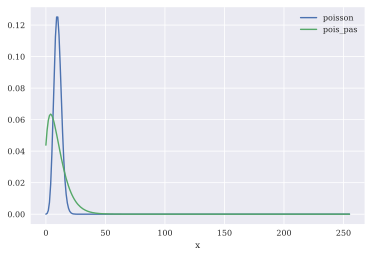

In [148]:
df = pois_pas(10, 1.1, 2, 8)

,mean,claimants,cv_claimants,k,P,θ,pm,pv,pois_pasm,pois_pasv,cvest
Sample,10,2,2.1,0.226757,8.82,5.0,10.0,10.0,10.0,118.199999,1.087198


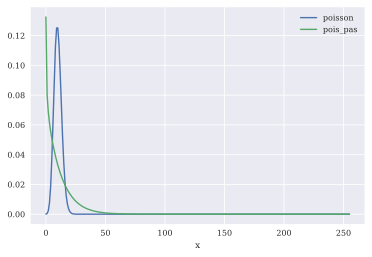

In [154]:
df = pois_pas(10, 2, 2.1, 8)